In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
Data = pd.read_csv(r"C:\Users\DELL\Downloads\SMA_data.csv")

In [3]:
Data

,Datetime,SMA
0,2018-01-01 04:34:10.320672,6864.691463
1,2018-01-01 12:37:36.596064,6864.689664
2,2018-01-01 20:31:55.898112,6864.688585
3,2018-01-02 05:42:49.014720,6864.684927
4,2018-01-02 12:13:01.263360,6864.682858
...,...,...
2286,2019-12-30 03:03:24.992640,6872.930137
2287,2019-12-30 11:05:46.768704,6872.928514
2288,2019-12-30 19:01:25.464576,6872.927281
2289,2019-12-31 10:44:01.110912,6872.923732


In [4]:
Data.isnull().sum()

Datetime    0
SMA         0
dtype: int64

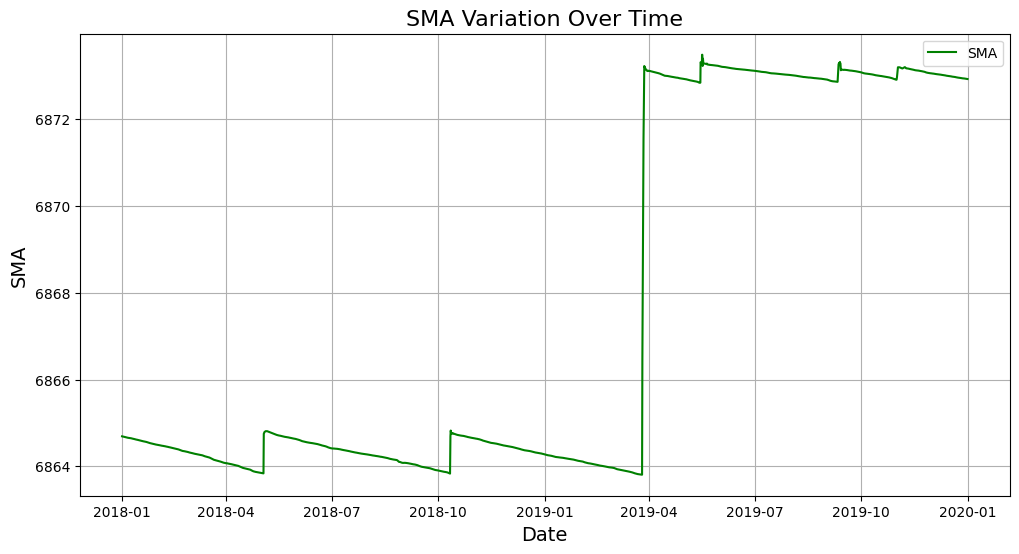

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Data['Datetime'] = pd.to_datetime(Data['Datetime'])

# Plotting the SMA values over time
plt.figure(figsize=(12, 6))
plt.plot(Data['Datetime'], Data['SMA'], color='g', label='SMA')

plt.xlabel('Date', fontsize=14)
plt.ylabel('SMA', fontsize=14)
plt.title('SMA Variation Over Time', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

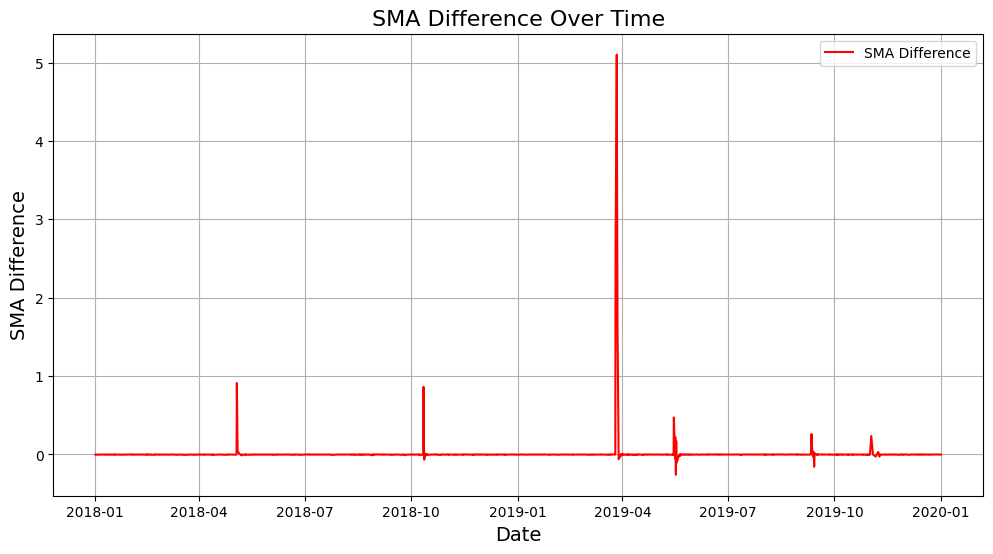

In [6]:
# Calculate the difference in SMA values between consecutive rows
Data['SMA_diff'] = Data['SMA'].diff()

# Visualize SMA differences
plt.figure(figsize=(12, 6))
plt.plot(Data['Datetime'], Data['SMA_diff'], color='r', label='SMA Difference')

plt.xlabel('Date', fontsize=14)
plt.ylabel('SMA Difference', fontsize=14)
plt.title('SMA Difference Over Time', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

In [7]:
# threshold for detecting maneuvers
maneuver_threshold = 1

# Finding the maneuver based on threshld
Data['Maneuver'] = (Data['SMA_diff'].abs() > maneuver_threshold).astype(int)

# maneuvers are detected
maneuver_data = Data[Data['Maneuver'] == 1]
print(maneuver_data[['Datetime', 'SMA', 'SMA_diff']])

                       Datetime          SMA  SMA_diff
1421 2019-03-26 04:53:33.243936  6866.447702  2.640831
1422 2019-03-27 04:34:36.436800  6871.548711  5.101009
1423 2019-03-27 20:25:37.599168  6873.222542  1.673831


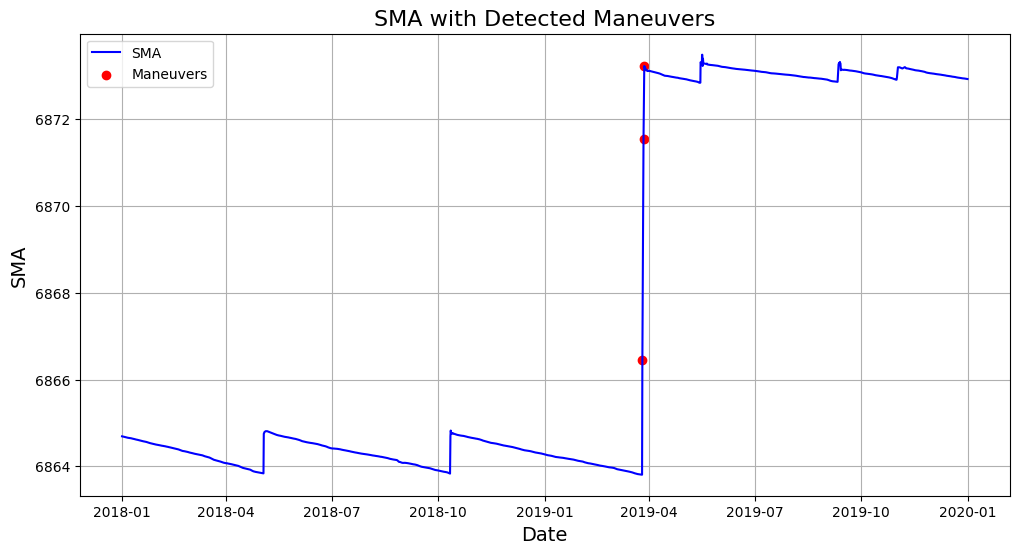

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(Data['Datetime'], Data['SMA'], color='b', label='SMA')
plt.scatter(maneuver_data['Datetime'], maneuver_data['SMA'], color='r', label='Maneuvers', marker='o')

plt.xlabel('Date', fontsize=14)
plt.ylabel('SMA', fontsize=14)
plt.title('SMA with Detected Maneuvers', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

In [9]:
Data

,Datetime,SMA,SMA_diff,Maneuver
0,2018-01-01 04:34:10.320672,6864.691463,NaN,0
1,2018-01-01 12:37:36.596064,6864.689664,-0.001799,0
2,2018-01-01 20:31:55.898112,6864.688585,-0.001079,0
3,2018-01-02 05:42:49.014720,6864.684927,-0.003658,0
4,2018-01-02 12:13:01.263360,6864.682858,-0.002069,0
...,...,...,...,...
2286,2019-12-30 03:03:24.992640,6872.930137,-0.001594,0
2287,2019-12-30 11:05:46.768704,6872.928514,-0.001624,0
2288,2019-12-30 19:01:25.464576,6872.927281,-0.001233,0
2289,2019-12-31 10:44:01.110912,6872.923732,-0.003548,0


In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(Data)

                       Datetime          SMA  SMA_diff  Maneuver
0    2018-01-01 04:34:10.320672  6864.691463       NaN         0
1    2018-01-01 12:37:36.596064  6864.689664 -0.001799         0
2    2018-01-01 20:31:55.898112  6864.688585 -0.001079         0
3    2018-01-02 05:42:49.014720  6864.684927 -0.003658         0
4    2018-01-02 12:13:01.263360  6864.682858 -0.002069         0
5    2018-01-02 21:38:45.514752  6864.681269 -0.001589         0
6    2018-01-03 05:20:51.018144  6864.678421 -0.002848         0
7    2018-01-03 13:20:01.716288  6864.675902 -0.002518         0
8    2018-01-03 21:10:25.002048  6864.673984 -0.001919         0
9    2018-01-04 04:56:39.177600  6864.670266 -0.003718         0
10   2018-01-04 12:56:40.436160  6864.667987 -0.002279         0
11   2018-01-04 20:53:42.523584  6864.666518 -0.001469         0
12   2018-01-05 04:32:31.251840  6864.663790 -0.002728         0
13   2018-01-05 12:36:09.598176  6864.661631 -0.002159         0
14   2018-01-05 20:30:33.

In [11]:
Data['SMA_diff'] = Data['SMA_diff'].fillna(0)

In [12]:
Data.head()

,Datetime,SMA,SMA_diff,Maneuver
0,2018-01-01 04:34:10.320672,6864.691463,0.000000,0
1,2018-01-01 12:37:36.596064,6864.689664,-0.001799,0
2,2018-01-01 20:31:55.898112,6864.688585,-0.001079,0
3,2018-01-02 05:42:49.014720,6864.684927,-0.003658,0
4,2018-01-02 12:13:01.263360,6864.682858,-0.002069,0


In [13]:
# Extract Date and Time from the 'Datetime' column
Data['Date'] = Data['Datetime'].dt.date
Data['Time'] = Data['Datetime'].dt.time

In [14]:
# Drop the 'Datetime' column
Data = Data.drop(columns=['Datetime'])

In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(Data)

              SMA  SMA_diff  Maneuver        Date             Time
0     6864.691463  0.000000         0  2018-01-01  04:34:10.320672
1     6864.689664 -0.001799         0  2018-01-01  12:37:36.596064
2     6864.688585 -0.001079         0  2018-01-01  20:31:55.898112
3     6864.684927 -0.003658         0  2018-01-02  05:42:49.014720
4     6864.682858 -0.002069         0  2018-01-02  12:13:01.263360
5     6864.681269 -0.001589         0  2018-01-02  21:38:45.514752
6     6864.678421 -0.002848         0  2018-01-03  05:20:51.018144
7     6864.675902 -0.002518         0  2018-01-03  13:20:01.716288
8     6864.673984 -0.001919         0  2018-01-03  21:10:25.002048
9     6864.670266 -0.003718         0  2018-01-04  04:56:39.177600
10    6864.667987 -0.002279         0  2018-01-04  12:56:40.436160
11    6864.666518 -0.001469         0  2018-01-04  20:53:42.523584
12    6864.663790 -0.002728         0  2018-01-05  04:32:31.251840
13    6864.661631 -0.002159         0  2018-01-05  12:36:09.59

In [18]:
Data['Days_Since_Last_Maneuver'] = 0

counter = 0

# Keep track of the last processed date to avoid recounting the same day
last_processed_day = None

# Iterate over the DataFrame to calculate days
for i in range(len(Data)):
    current_day = Data['Date'].iloc[i]
    
    if current_day != last_processed_day:
        if Data['Maneuver'].iloc[i] == 1:
            counter = 0
        else:
            counter += 1        
        last_processed_day = current_day

    # Assign the value to the new column
    Data['Days_Since_Last_Maneuver'].iloc[i] = counter

C:\Users\DELL\AppData\Local\Temp\ipykernel_46680\2988083012.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Days_Since_Last_Maneuver'].iloc[i] = counter
C:\Users\DELL\AppData\Local\Temp\ipykernel_46680\2988083012.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Days_Since_Last_Maneuver'].iloc[i] = counter
C:\Users\DELL\AppData\Local\Temp\ipykernel_46680\2988083012.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(Data)

              SMA  SMA_diff  Maneuver       Date             Time  \
0     6864.691463  0.000000         0 2018-01-01  04:34:10.320672   
1     6864.689664 -0.001799         0 2018-01-01  12:37:36.596064   
2     6864.688585 -0.001079         0 2018-01-01  20:31:55.898112   
3     6864.684927 -0.003658         0 2018-01-02  05:42:49.014720   
4     6864.682858 -0.002069         0 2018-01-02  12:13:01.263360   
5     6864.681269 -0.001589         0 2018-01-02  21:38:45.514752   
6     6864.678421 -0.002848         0 2018-01-03  05:20:51.018144   
7     6864.675902 -0.002518         0 2018-01-03  13:20:01.716288   
8     6864.673984 -0.001919         0 2018-01-03  21:10:25.002048   
9     6864.670266 -0.003718         0 2018-01-04  04:56:39.177600   
10    6864.667987 -0.002279         0 2018-01-04  12:56:40.436160   
11    6864.666518 -0.001469         0 2018-01-04  20:53:42.523584   
12    6864.663790 -0.002728         0 2018-01-05  04:32:31.251840   
13    6864.661631 -0.002159       

In [20]:
Data.tail()

,SMA,SMA_diff,Maneuver,Date,Time,Days_Since_Last_Maneuver
2287,6872.928514,-0.001624,0,2019-12-30,11:05:46.768704,271
2286,6872.930137,-0.001594,0,2019-12-30,03:03:24.992640,271
2288,6872.927281,-0.001233,0,2019-12-30,19:01:25.464576,271
2289,6872.923732,-0.003548,0,2019-12-31,10:44:01.110912,272
2290,6872.922860,-0.000872,0,2019-12-31,18:43:37.271136,272


                               SMA  SMA_diff  Maneuver  \
SMA                       1.000000  0.023002  0.023807   
SMA_diff                  0.023002  1.000000  0.882111   
Maneuver                  0.023807  0.882111  1.000000   
Days_Since_Last_Maneuver -0.383112 -0.050989 -0.057033   

                          Days_Since_Last_Maneuver  
SMA                                      -0.383112  
SMA_diff                                 -0.050989  
Maneuver                                 -0.057033  
Days_Since_Last_Maneuver                  1.000000  


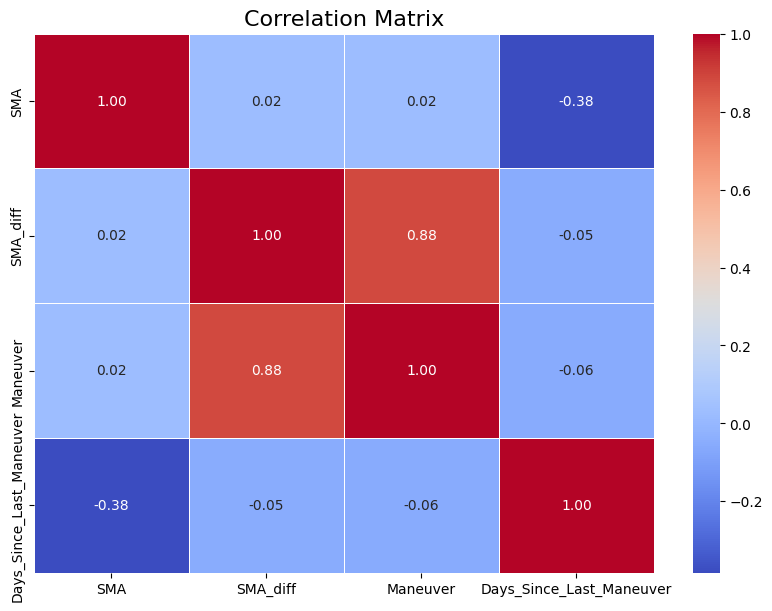

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Data' is your DataFrame
correlation_matrix = Data[['SMA', 'SMA_diff', 'Maneuver','Days_Since_Last_Maneuver']].corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adding labels and title
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Heuristic Methods

In [ ]:
# Maneuver Detection

In [26]:
# last SMA value in the dataset
last_sma_value = Data['SMA'].iloc[-1]

# threshold for maneuver detection
threshold = 1  # Define the threshold value you want to use

# thresholds based on the last SMA value
lower_threshold = last_sma_value - threshold
upper_threshold = last_sma_value + threshold

def is_maneuver(sma_value):
    # Check if the provided SMA value is outside the range
    if sma_value < lower_threshold or sma_value > upper_threshold:
        return 'Maneuver Detected'
    else:
        return 'No Maneuver'

# User Input
user_sma_value = float(input("Enter the SMA value: "))
result = is_maneuver(user_sma_value)
print(result)

Enter the SMA value: 6872.4544
No Maneuver


In [28]:
# last SMA value in the dataset
last_sma_value = Data['SMA'].iloc[-1]

# threshold for maneuver detection
threshold = 1  # Define the threshold value you want to use

# thresholds based on the last SMA value
lower_threshold = last_sma_value - threshold
upper_threshold = last_sma_value + threshold

def is_maneuver(sma_value):
    # Check if the provided SMA value is outside the range
    if sma_value < lower_threshold or sma_value > upper_threshold:
        return 'Maneuver Detected'
    else:
        return 'No Maneuver'

# User Input
user_sma_value = float(input("Enter the SMA value: "))
result = is_maneuver(user_sma_value)
print(result)

Enter the SMA value: 6874.9555
Maneuver Detected


In [ ]:
# Days left for next Maneuver

In [22]:
import pandas as pd

# threshold for maneuver
maneuver_threshold = 449


def check_maneuver(user_date, Data):
    # Ensure input date is within the dataset range
    if user_date < Data['Date'].min() or user_date > Data['Date'].max():
        return f"Date {user_date} is out of the dataset range."

    # Find the corresponding row for the user input
    row = Data[Data['Date'] == user_date]
    
    # If the date is not found in the DataFrame
    if row.empty:
        return f"No data available for {user_date}."

    # Get the 'Days_Since_Last_Maneuver' value for the input
    days_since_last_maneuver = row['Days_Since_Last_Maneuver'].values[0]

    # Calculate the days remaining for the next maneuver
    days_left_for_next_maneuver = maneuver_threshold - days_since_last_maneuver
    
    # returning the result
    return (f"On {user_date}, the last maneuver was {days_since_last_maneuver} days ago. "
            f"There are {days_left_for_next_maneuver} days left until the next maneuver.")

# User Input
user_date = pd.to_datetime(input("Enter the date (YYYY-MM-DD): "))  # User input for date
result = check_maneuver(user_date, Data)
print(result)

Enter the date (YYYY-MM-DD): 2018-05-25
On 2018-05-25 00:00:00, the last maneuver was 145 days ago. There are 304 days left until the next maneuver.


In [23]:
import pandas as pd

# threshold for maneuver
maneuver_threshold = 449


def check_maneuver(user_date, Data):
    # Ensure input date is within the dataset range
    if user_date < Data['Date'].min() or user_date > Data['Date'].max():
        return f"Date {user_date} is out of the dataset range."

    # Find the corresponding row for the user input
    row = Data[Data['Date'] == user_date]
    
    # If the date is not found in the DataFrame
    if row.empty:
        return f"No data available for {user_date}."

    # Get the 'Days_Since_Last_Maneuver' value for the input
    days_since_last_maneuver = row['Days_Since_Last_Maneuver'].values[0]

    # Calculate the days remaining for the next maneuver
    days_left_for_next_maneuver = maneuver_threshold - days_since_last_maneuver
    
    # returning the result
    return (f"On {user_date}, the last maneuver was {days_since_last_maneuver} days ago. "
            f"There are {days_left_for_next_maneuver} days left until the next maneuver.")

# User Input
user_date = pd.to_datetime(input("Enter the date (YYYY-MM-DD): "))  # User input for date
result = check_maneuver(user_date, Data)
print(result)

Enter the date (YYYY-MM-DD): 2019-12-31
On 2019-12-31 00:00:00, the last maneuver was 272 days ago. There are 177 days left until the next maneuver.


In [24]:
import pandas as pd

# threshold for maneuver
maneuver_threshold = 449


def check_maneuver(user_date, Data):
    # Ensure input date is within the dataset range
    if user_date < Data['Date'].min() or user_date > Data['Date'].max():
        return f"Date {user_date} is out of the dataset range."

    # Find the corresponding row for the user input
    row = Data[Data['Date'] == user_date]
    
    # If the date is not found in the DataFrame
    if row.empty:
        return f"No data available for {user_date}."

    # Get the 'Days_Since_Last_Maneuver' value for the input
    days_since_last_maneuver = row['Days_Since_Last_Maneuver'].values[0]

    # Calculate the days remaining for the next maneuver
    days_left_for_next_maneuver = maneuver_threshold - days_since_last_maneuver
    
    # returning the result
    return (f"On {user_date}, the last maneuver was {days_since_last_maneuver} days ago. "
            f"There are {days_left_for_next_maneuver} days left until the next maneuver.")

# User Input
user_date = pd.to_datetime(input("Enter the date (YYYY-MM-DD): "))  # User input for date
result = check_maneuver(user_date, Data)
print(result)

Enter the date (YYYY-MM-DD): 2021-05-08
Date 2021-05-08 00:00:00 is out of the dataset range.
